In [1]:
# Script performs spam classification using Decision Trees
# Adapted from HW assignment for my Data Analytics course
# Author: Ryan Kingery
# Date: Oct 16, 2017

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
import graphviz

In [6]:
PATH = '/Users/ryankingery/Repos/Sharpest_Minds/'
ITERS = 20

In [2]:
# load data from internet and set up features X, target y
df = pd.read_csv("http://www.apps.stat.vt.edu/leman/VTCourses/spam.data.txt",
                 sep=' ',header=None)

X = df.values[:,:-1]
y = df.values[:,-1].reshape((len(df.values[:,-1]),1))

In [7]:
# performing 10-fold cross validation on decision tree over ITERS iterations to evaluate test set accuracy
avg_scores = []
for i in range(ITERS):
    kf = KFold(n_splits=10,shuffle=True)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = DecisionTreeClassifier(min_samples_leaf=1,max_depth=10)
        model.fit(X_train,y_train)
        scores += [model.score(X_test,y_test)]
    print "Iter "+str(i)+": "+str(np.mean(scores))
    avg_scores += [np.mean(scores)]

Iter 0: 0.921978213713
Iter 1: 0.924797698765
Iter 2: 0.924142223899
Iter 3: 0.926756578327
Iter 4: 0.922840233896
Iter 5: 0.921974912761
Iter 6: 0.920884183722
Iter 7: 0.923494765632
Iter 8: 0.922628029803
Iter 9: 0.923494765632
Iter 10: 0.922190417806
Iter 11: 0.925235782326
Iter 12: 0.924149768933
Iter 13: 0.923933792323
Iter 14: 0.925888899368
Iter 15: 0.922407809111
Iter 16: 0.921324625106
Iter 17: 0.929146939545
Iter 18: 0.924363859285
Iter 19: 0.922193247194


In [11]:
# generate and save decision tree image
dot_data = export_graphviz(model, out_file=None,max_depth=4,
                           filled=True, rounded=False,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.view(filename='tree',directory=PATH,cleanup=True)

'/Users/ryankingery/Repos/Sharpest_Minds/tree.pdf'

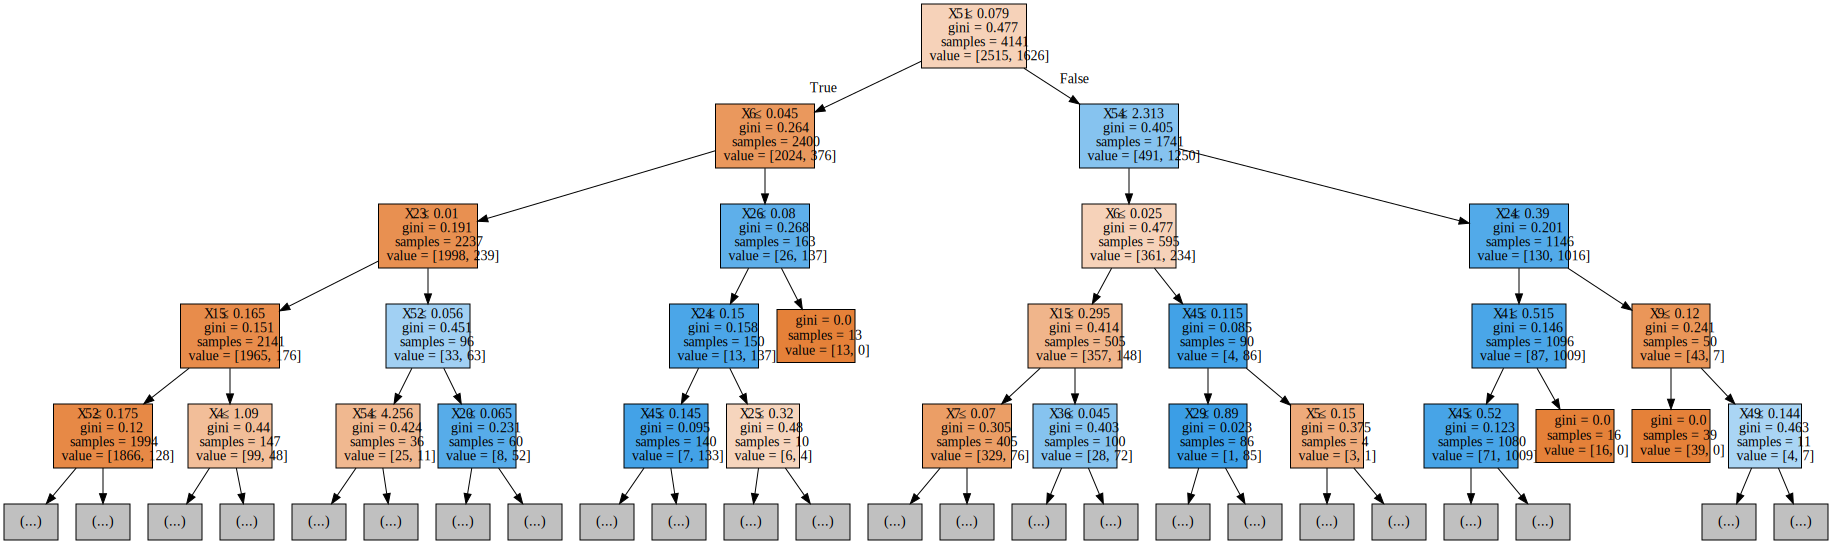

In [14]:
# in-line view of graph, note the formatting is much worse than the saved tree.pdf file generated above
graph